/Users/hagi/anaconda3/envs/enim/lib/python3.8/site-packages/nnAudio/Spectrogram.py:4: Warning: importing Spectrogram subpackage will be deprecated soon. You should import the feature extractor from the feature subpackage. See actual documentation.
  warnings.warn(
/Users/hagi/anaconda3/envs/enim/lib/python3.8/site-packages/nnAudio/utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)


CQT kernels created, time used = 0.0250 seconds
16000


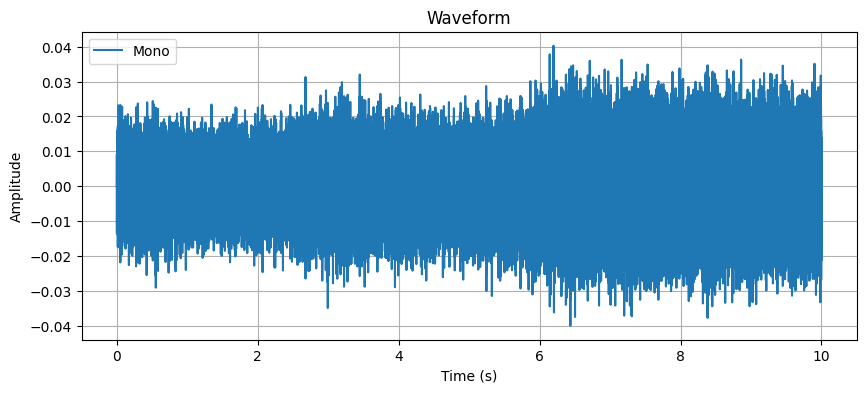

torch.Size([24, 2501, 1])


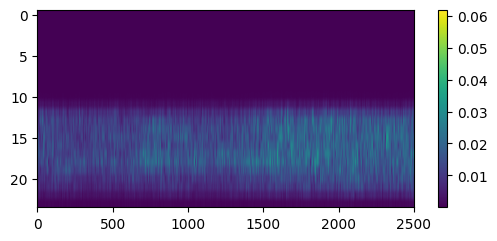

(100, 192)


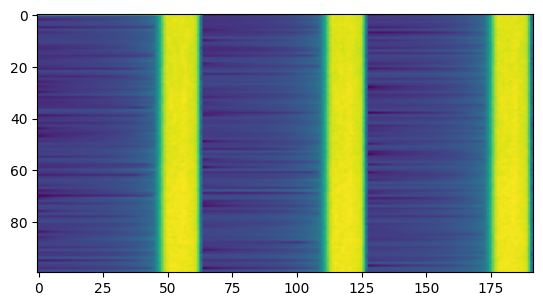

In [1]:
n = "DCASE_pump/normal_id_06_00000933.wav"
ano = "DCASE_pump/anomaly_id_06_00000100.wav"

import numpy as np
import matplotlib.pyplot as plt
import librosa
import sys
from scipy import signal
from utils import *

from scipy import signal
def apply_bandpass(x, lf=1, hf=100, order=16, sr=30000):
    sos = signal.butter(order, [lf, hf], btype="bandpass", output="sos", fs=sr)
    normalization = np.sqrt((hf - lf) / (sr / 2))
    x = signal.sosfiltfilt(sos, x) / normalization
    return x


def cqt_apply(wave):
    plot_waveform_numpy(wave, sr, title="Waveform")
    # CQT
    wave = torch.from_numpy(wave).float()
    image = cqt.cqt_transform(wave)
    image_ = image.transpose(0, 1).transpose(1, 2)
    print(image_.shape)
    cqt.show_cqt(image_)

    # STFT
    #spectrogram = stft.apply(waves)
    #print(spectrogram.shape)
    #stft.show_stft(spectrogram)

def file_load(wav_name, mono=False):
    """
    load .wav file.

    wav_name : str
        target .wav file
    sampling_rate : int
        audio file sampling_rate
    mono : boolean
        When load a multi channels file and this param True, the returned data will be merged for mono data
    """
    y, sr = librosa.load(wav_name, sr=None, mono=mono)
    return y, sr

def mel_apply(y):
    mel_vector = wav2mel_vector(y, sr=sr)
    mel_vector = np.resize(mel_vector, (100, 64*3))
    print(mel_vector.shape)
    plt.imshow(mel_vector),plt.show()

cqt = CQTtransform(sr=16000, fmin=2000, fmax=8000, hop_length=64)


y, sr = file_load(n, mono=False)
print(sr)
wave = apply_bandpass(y, lf=4000, hf=7000, order=16, sr=16000)
cqt_apply(wave)
mel_apply(wave)

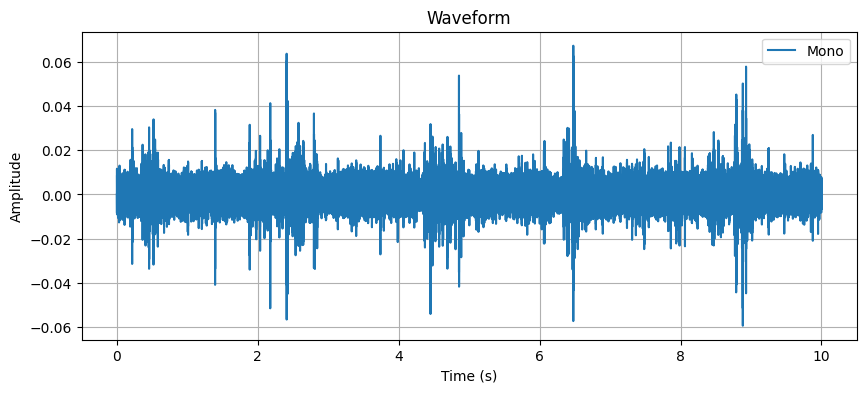

torch.Size([24, 2501, 1])


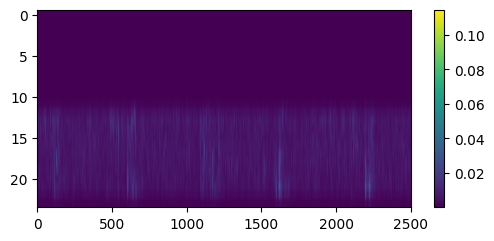

(100, 192)


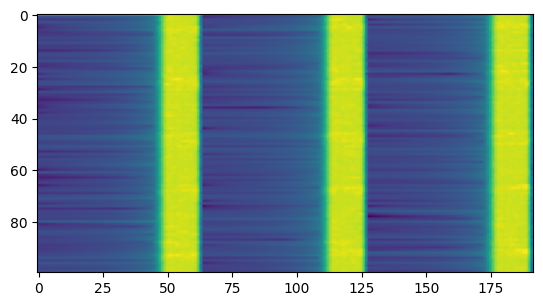

In [33]:
y, sr = file_load(ano, mono=False)
wave = apply_bandpass(y, lf=4000, hf=7000, order=16, sr=16000)
cqt_apply(wave)
mel_apply(wave)